In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns


path = "WA_Fn-UseC_-Telco-Customer-Churn.csv" 
df = pd.read_csv(path) if os.path.exists(path) else None

---
First Step: EDA

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

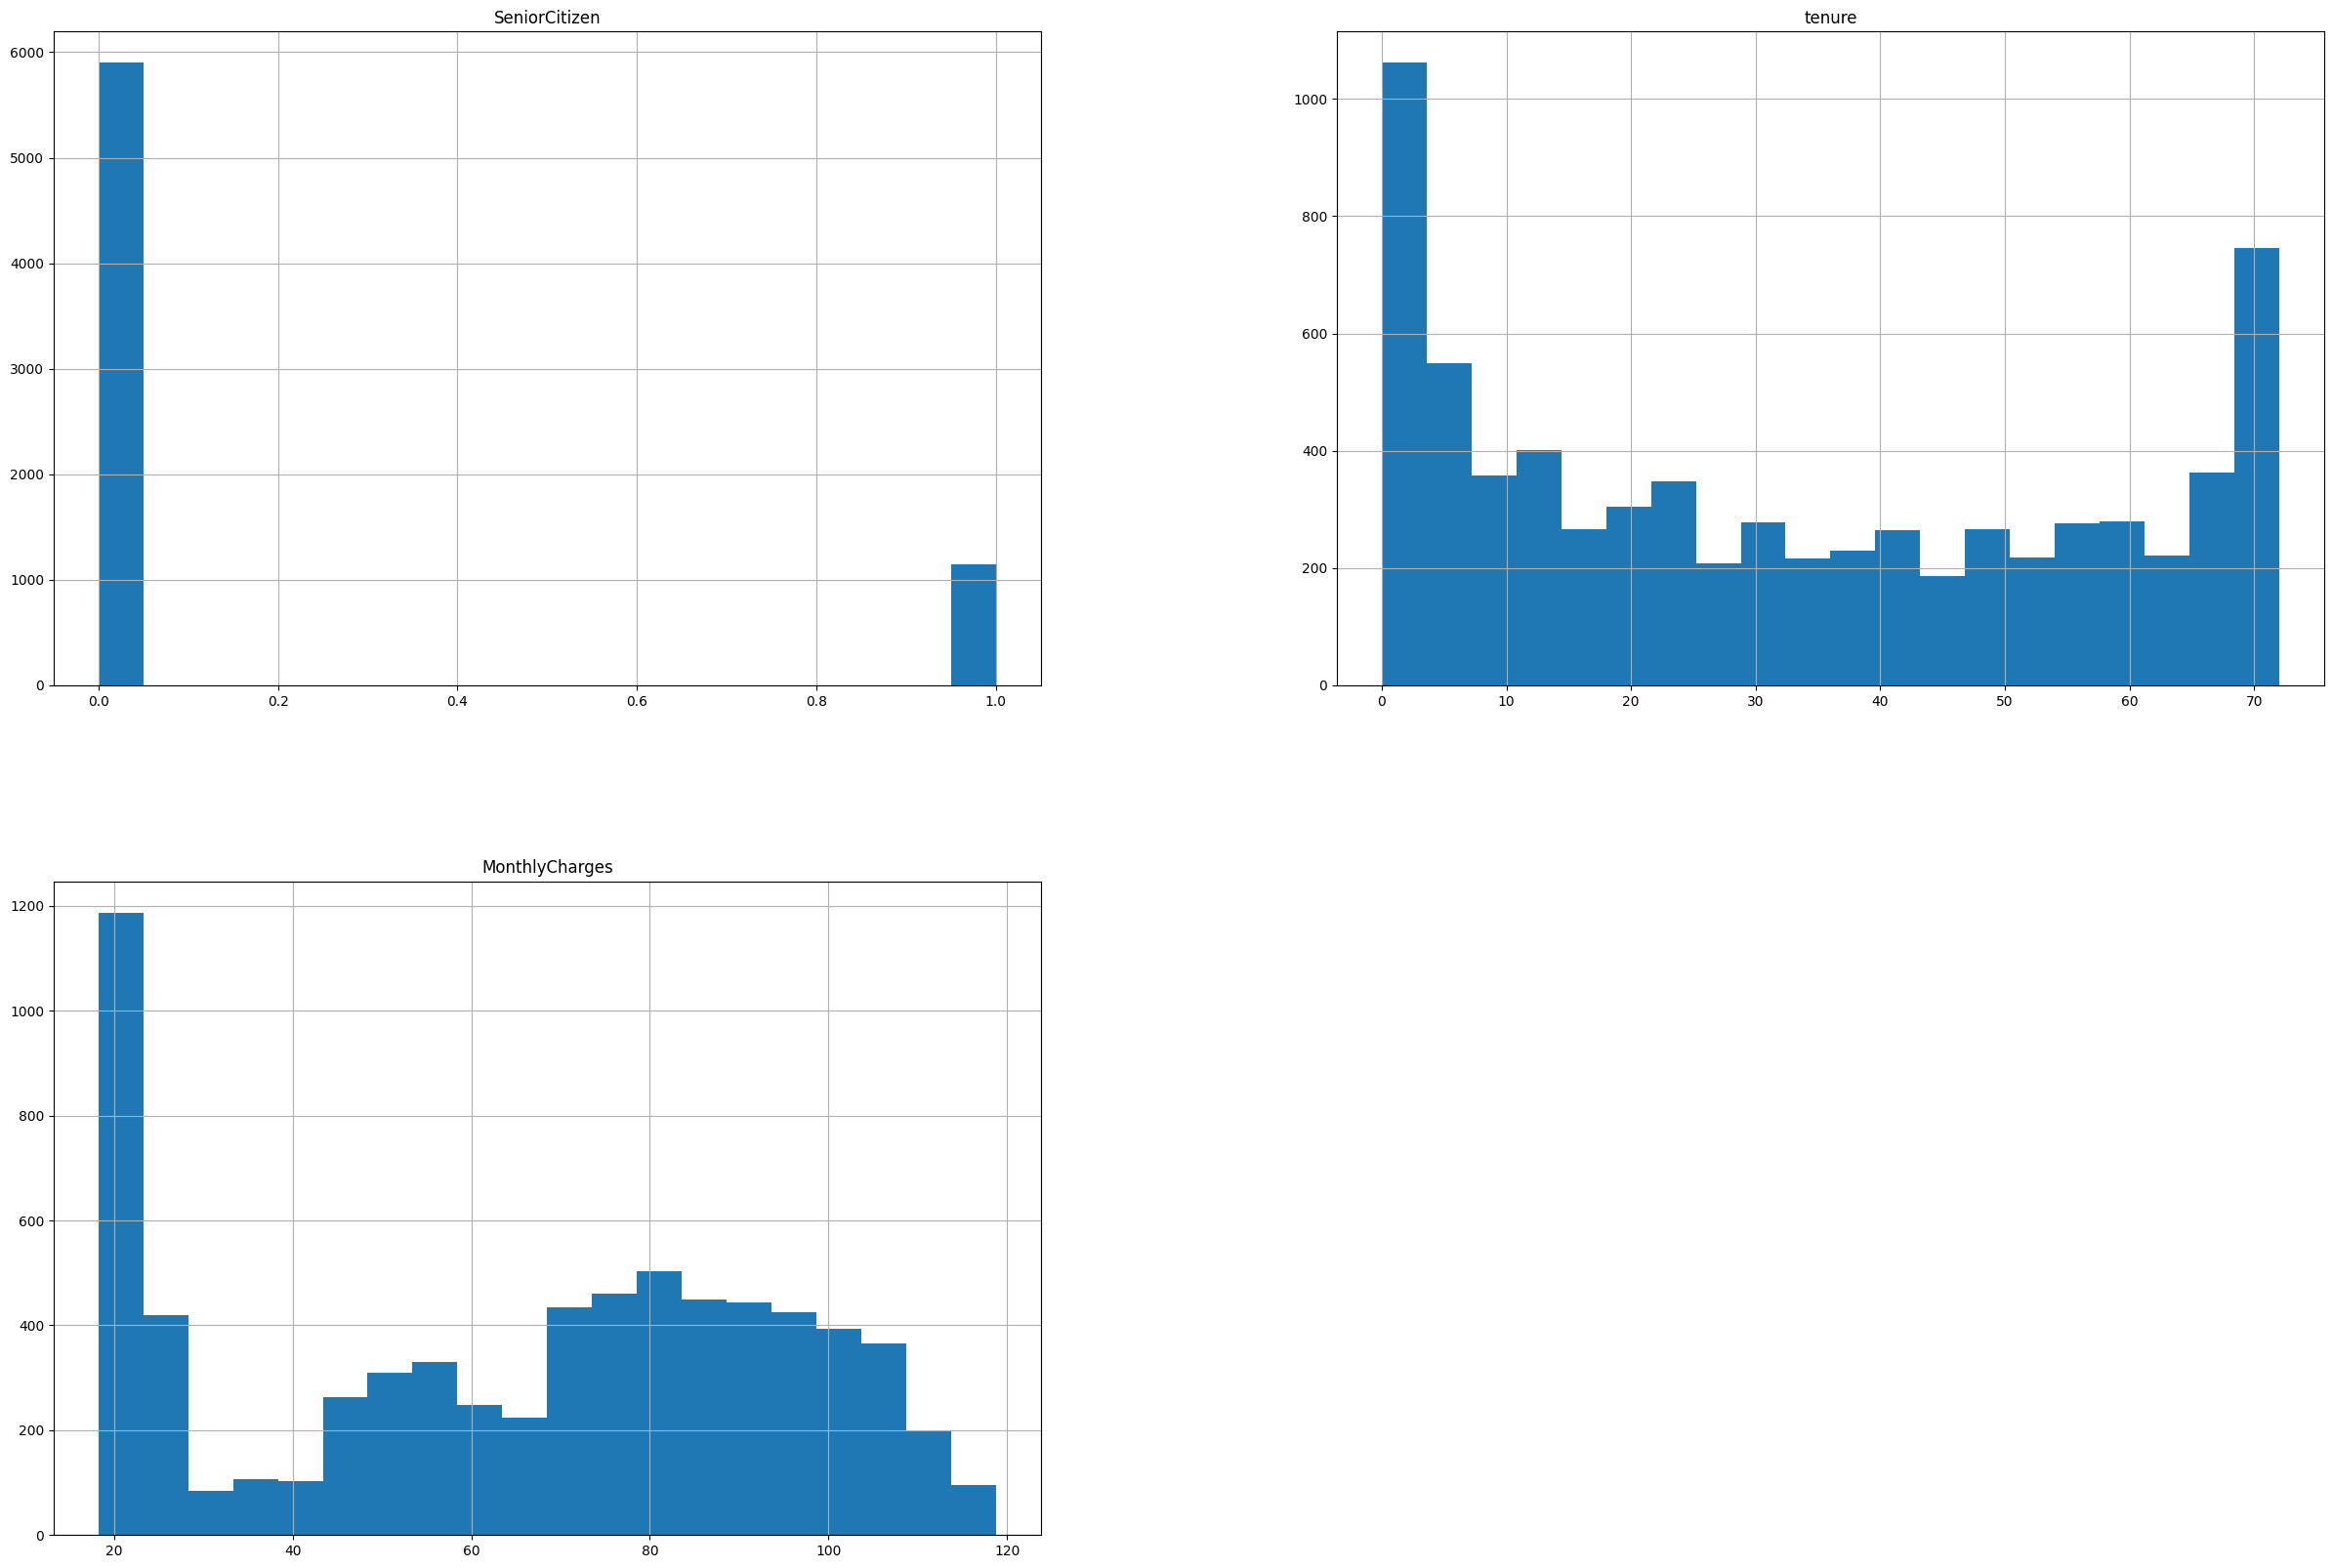

In [5]:
num_bins = 20
df.hist(bins=num_bins, figsize=(30,20))
plt.show();

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols, num_cols

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn',
  'SeniorCitizen'],
 ['tenure', 'MonthlyCharges'])

In [8]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1}).astype("int64")

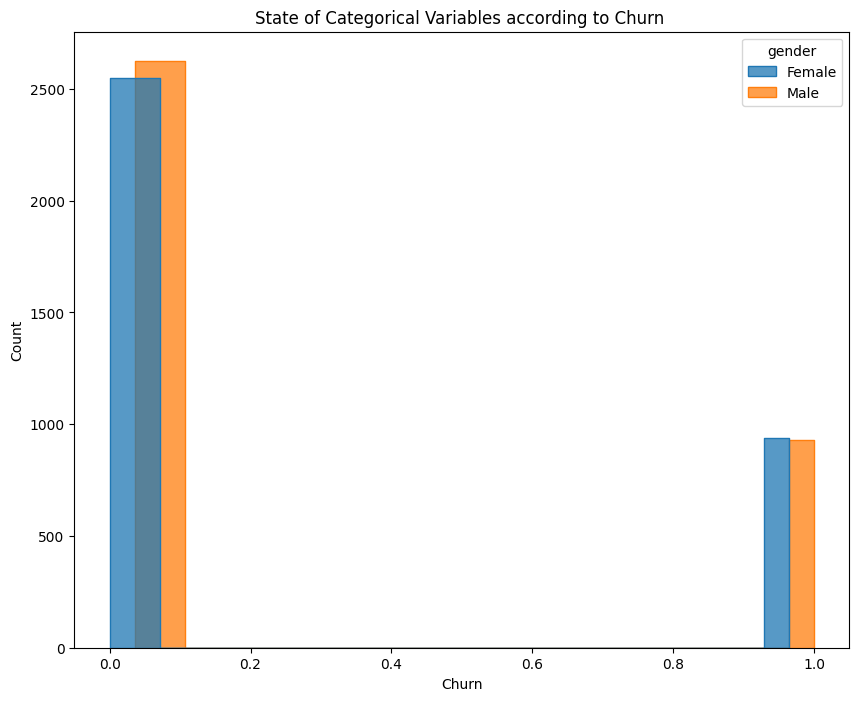

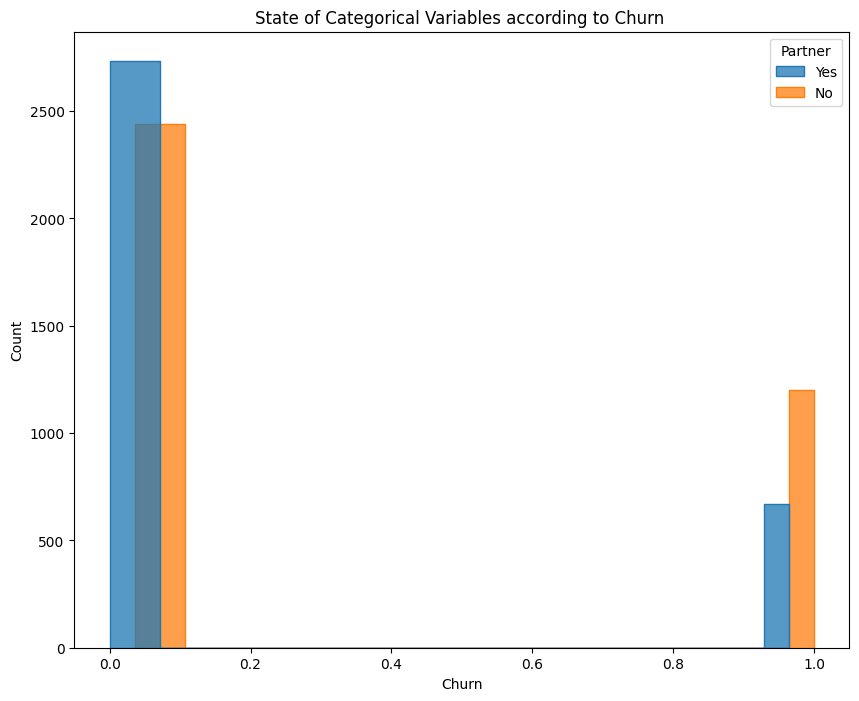

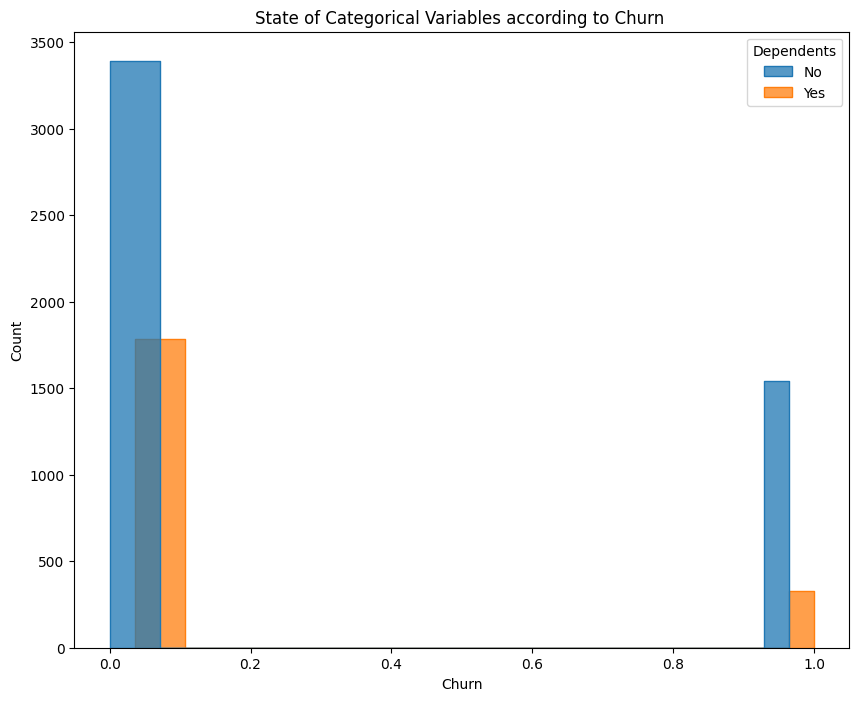

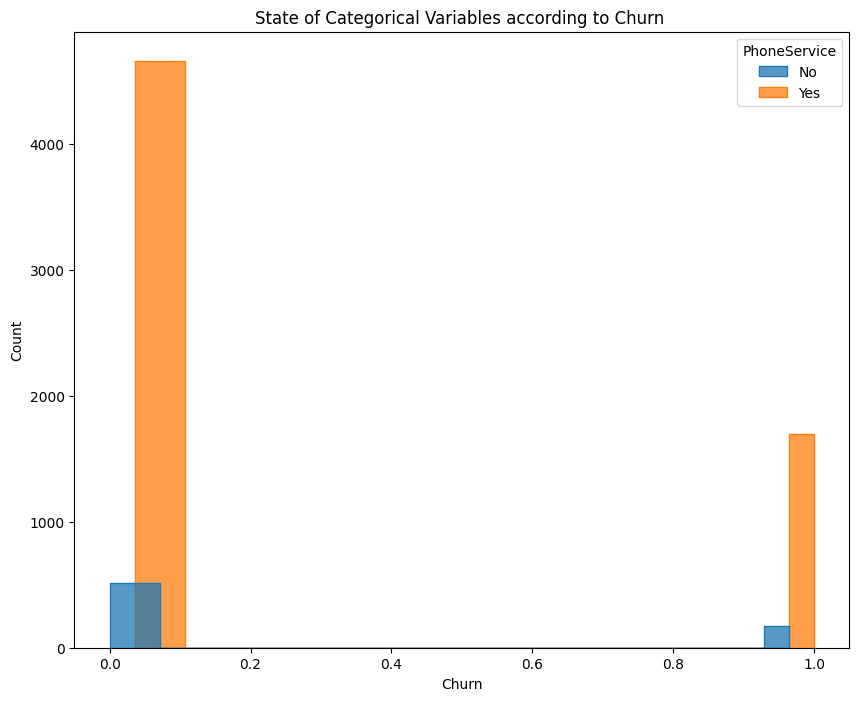

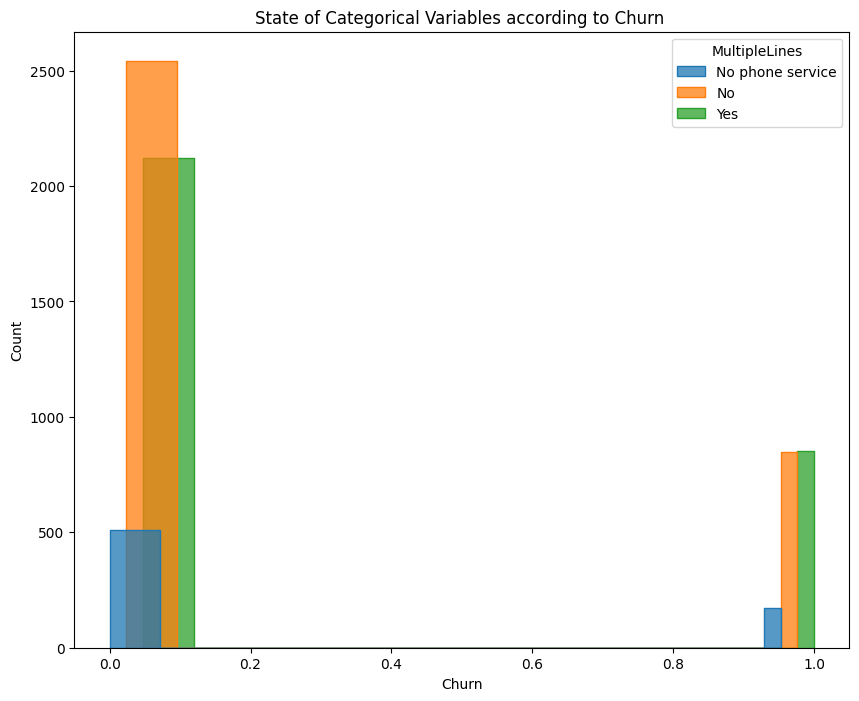

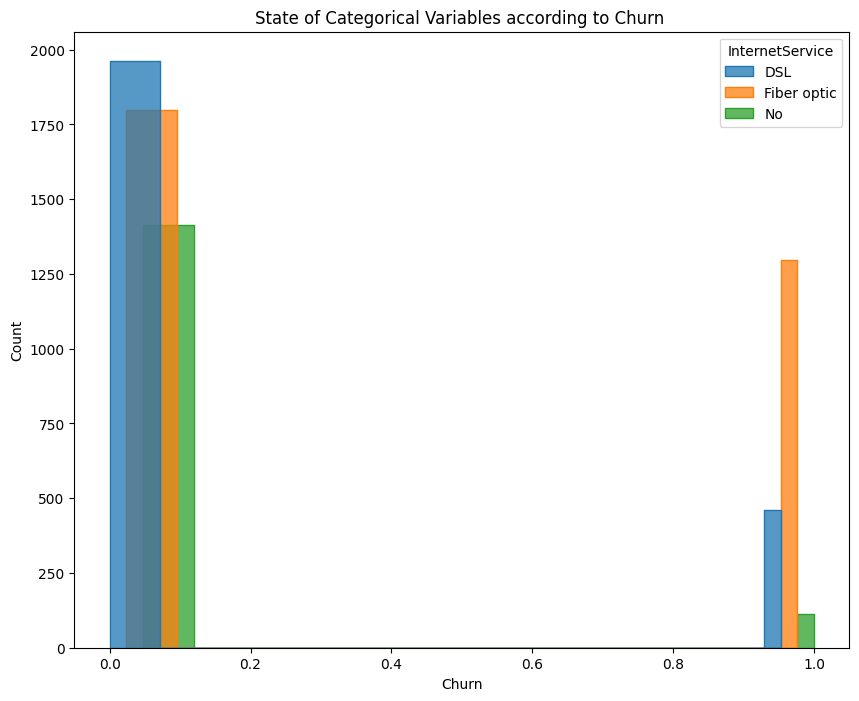

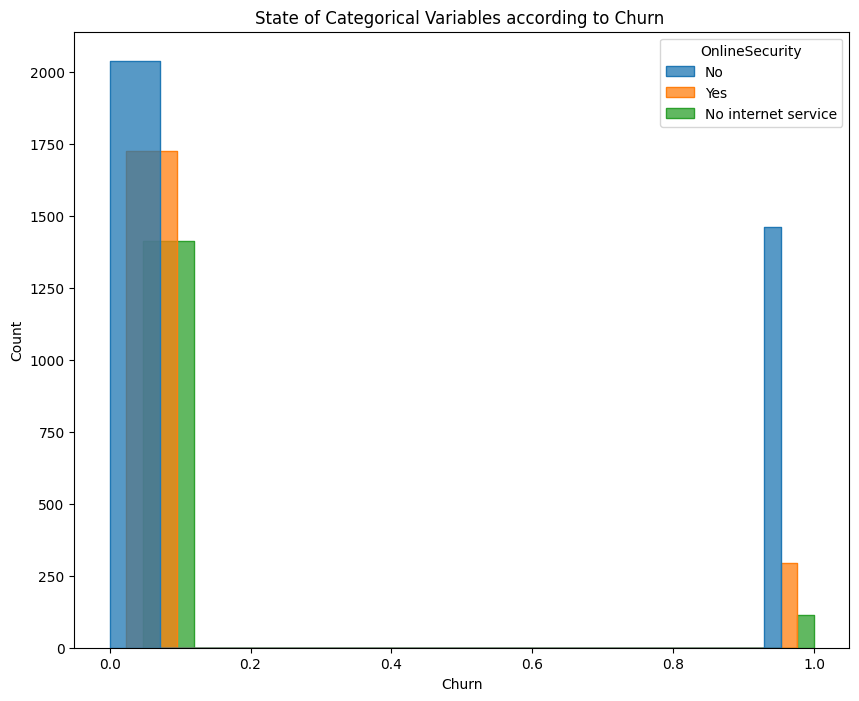

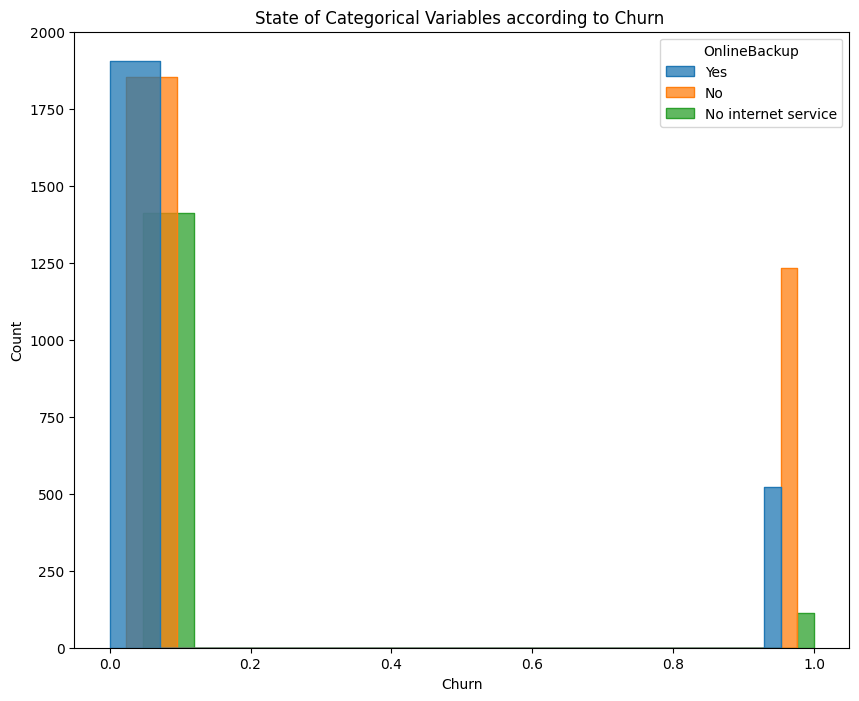

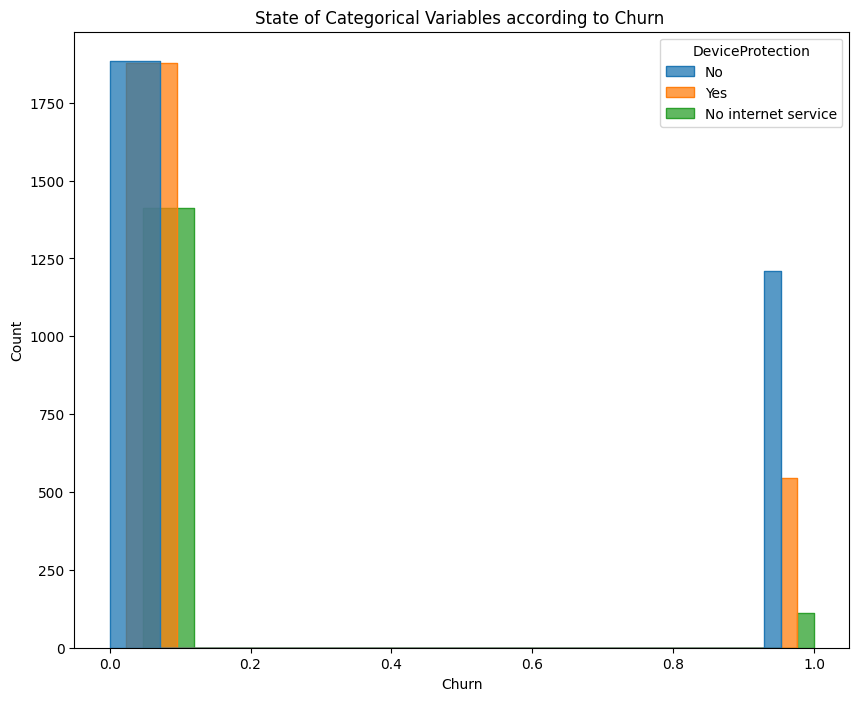

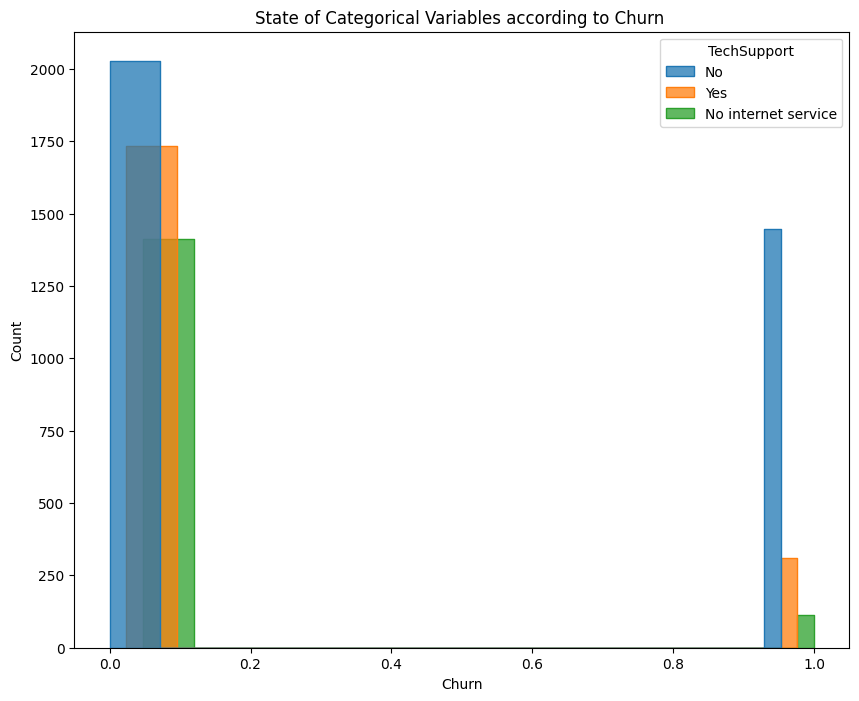

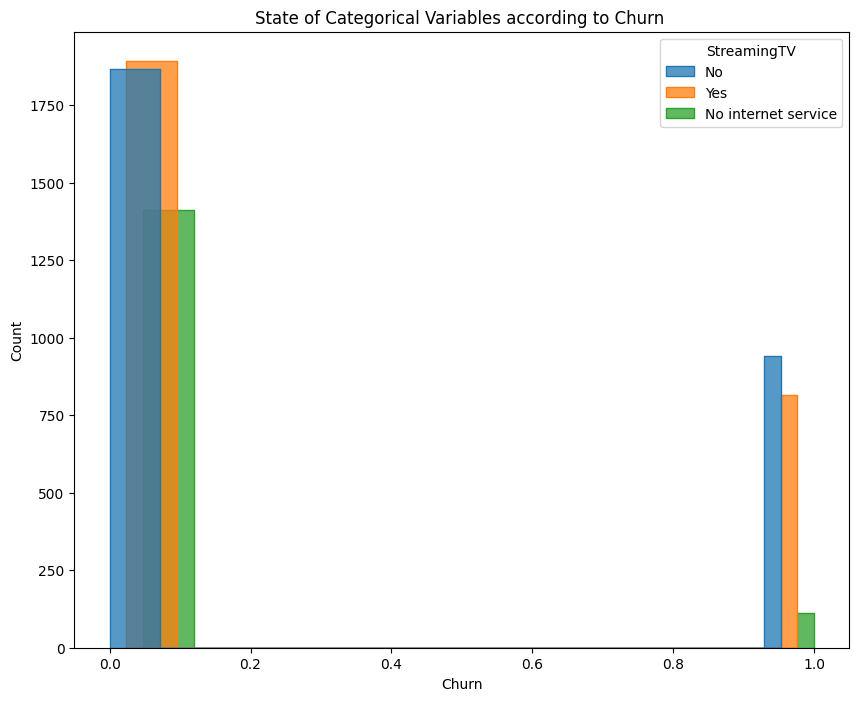

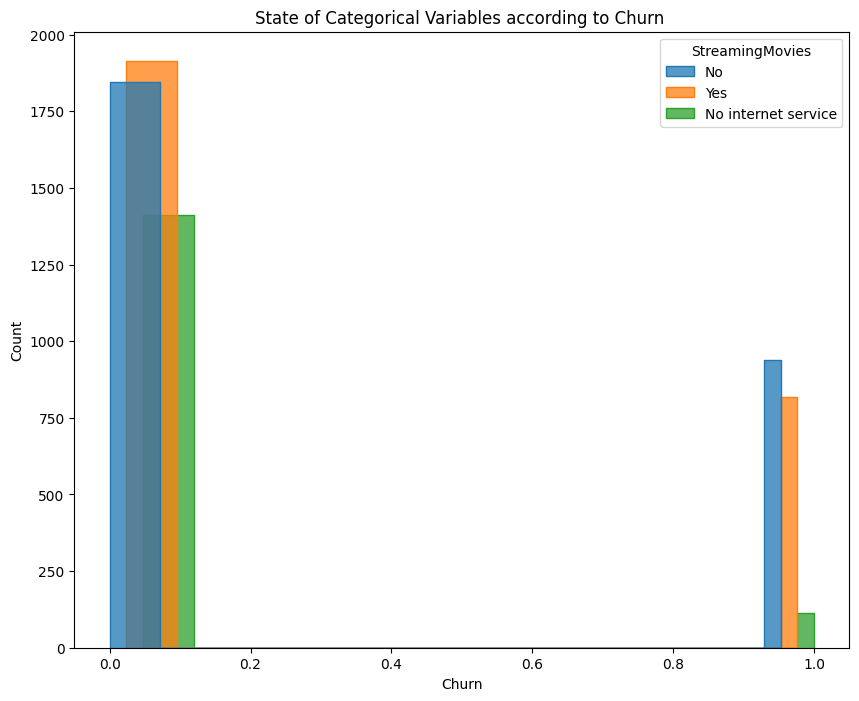

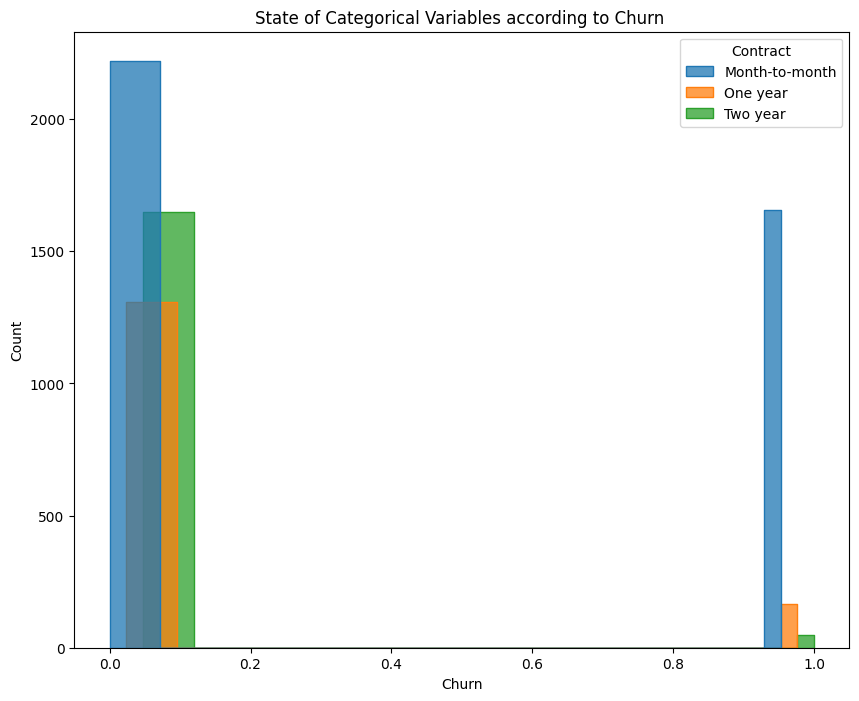

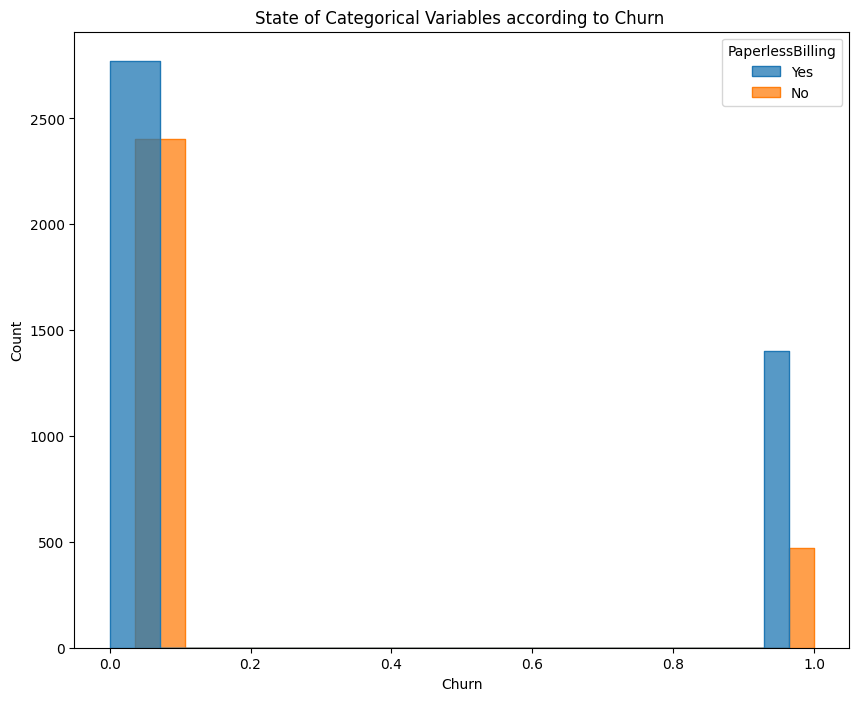

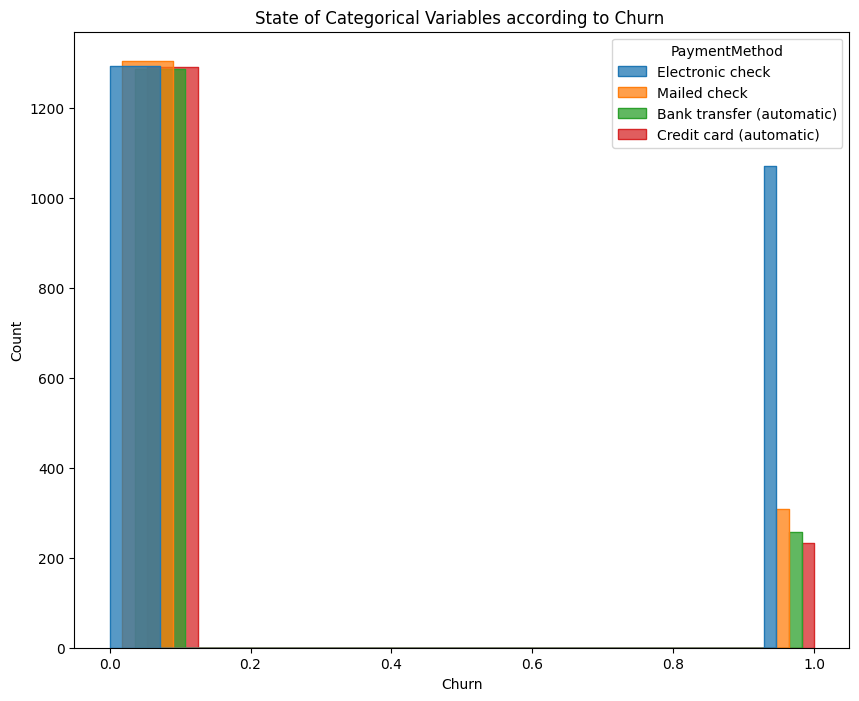

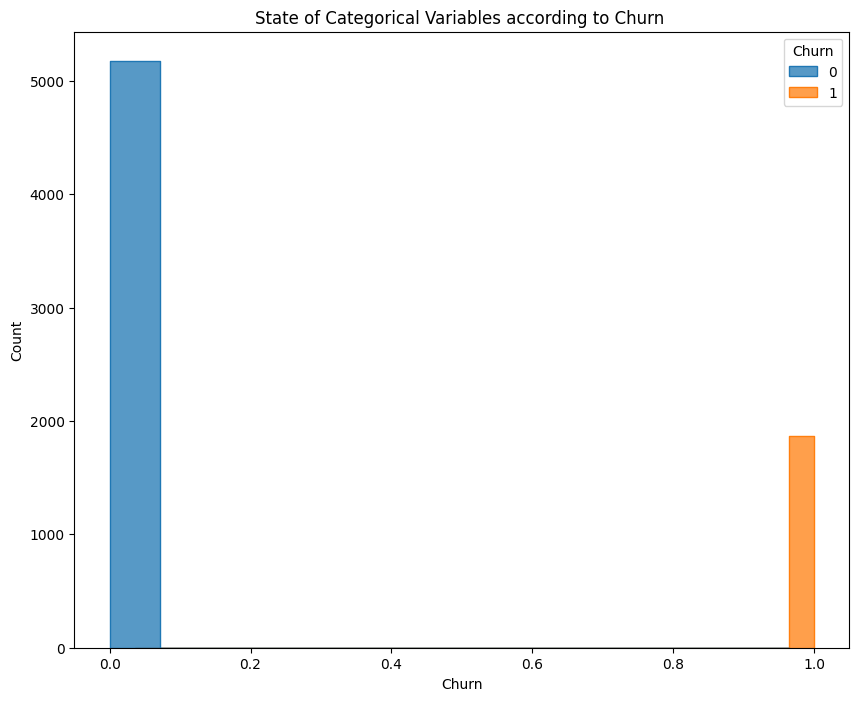

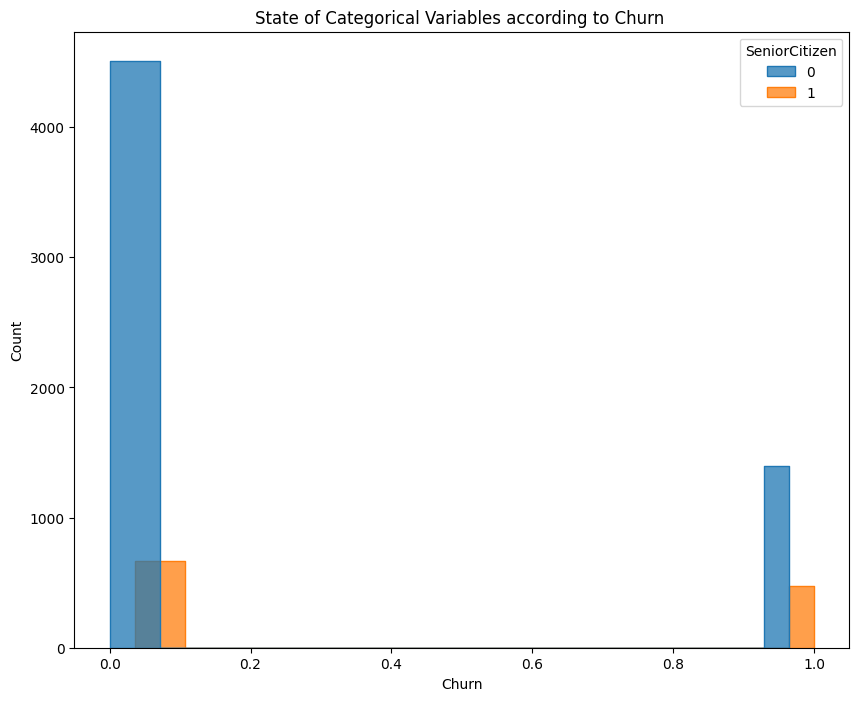

In [9]:
def target_vs_category_visual(dataframe, target, categorical_col):
    plt.figure(figsize=(10, 8))
    sns.histplot(x=target, hue=categorical_col, data=dataframe, element="step", multiple="dodge")
    plt.title("State of Categorical Variables according to Churn ")
    plt.show()


for col in cat_cols:
    target_vs_category_visual(df, "Churn", col)

In [10]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

          tenure
Churn           
0      37.569965
1      17.979133

       MonthlyCharges
Churn                
0           61.265124
1           74.441332



In [11]:
corr_matrix = df[num_cols].corr()
corr_matrix

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [32]:
#df.corrwith(df["Churn"]).sort_values(ascending=False)

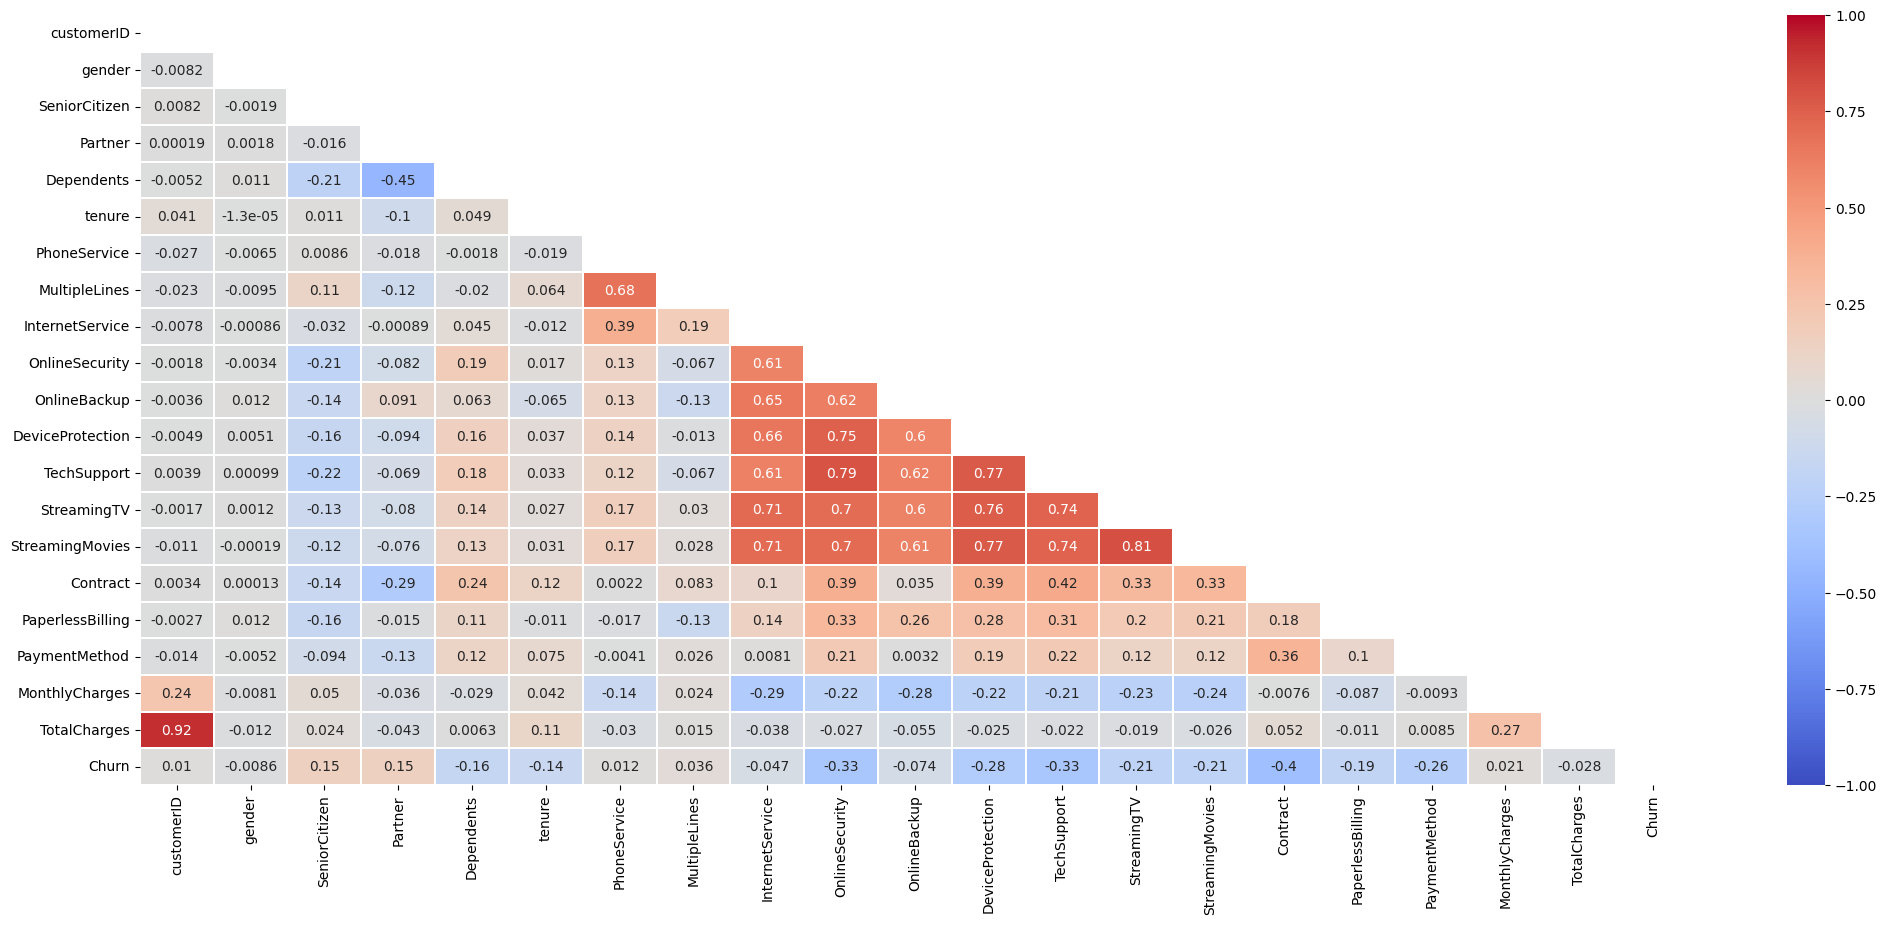

In [12]:
plt.figure(5, figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

---
Step2. Preparation & Pipeline

In [13]:
X = df.drop(columns=["Churn", "customerID"])

y = df["Churn"]

X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors="coerce")


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Churn rate train:", y_train.mean().round(3), "test:", y_test.mean().round(3))


Train shape: (5634, 19) Test shape: (1409, 19)
Churn rate train: 0.265 test: 0.265


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


num_selector = selector(dtype_include=np.number)
cat_selector = selector(dtype_exclude=np.number)


numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_selector),
        ("cat", categorical_pipe, cat_selector),
    ],
    remainder="drop",          
    verbose_feature_names_out=False
)


preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Transformed train shape:", X_train_transformed.shape)
print("Transformed test shape:", X_test_transformed.shape)


Transformed train shape: (5634, 45)
Transformed test shape: (1409, 45)


In [15]:
print("NaN top-n(10):")
print(X_train.isna().mean().sort_values(ascending=False).head(10))

NaN top-n(10):
TotalCharges       0.00142
SeniorCitizen      0.00000
gender             0.00000
Partner            0.00000
Dependents         0.00000
PhoneService       0.00000
tenure             0.00000
InternetService    0.00000
OnlineSecurity     0.00000
OnlineBackup       0.00000
dtype: float64


In [16]:
import scipy.sparse as sp

def has_nan(matrix):
    if sp.issparse(matrix):
        data = matrix.data
        return np.isnan(data).any()
    return np.isnan(matrix).any()

print("NaN in transformed train:", has_nan(X_train_transformed))
print("NaN in transformed test:", has_nan(X_test_transformed))

NaN in transformed train: False
NaN in transformed test: False


In [17]:
print("Numeric columns:", list(num_selector(X_train)))
print("Categorical columns:", list(cat_selector(X_train)))

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [18]:
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [19]:
from sklearn.preprocessing import OneHotEncoder

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

In [20]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_selector),
        ("cat", categorical_pipe, cat_selector)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

In [21]:
preprocessor.fit(X_train)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [22]:
feature_names = preprocessor.get_feature_names_out()
print("Total features after preprocessing:", len(feature_names))
print(feature_names[:20])

Total features after preprocessing: 45
['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Female'
 'gender_Male' 'Partner_No' 'Partner_Yes' 'Dependents_No' 'Dependents_Yes'
 'PhoneService_No' 'PhoneService_Yes' 'MultipleLines_No'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service']


In [23]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score
)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [26]:
import mlflow
import xgboost

print("MLflow:", mlflow.__version__)
print("XGBoost:", xgboost.__version__)


c:\Users\hanna\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MLflow: 3.9.0
XGBoost: 3.1.3


In [27]:
from xgboost import XGBClassifier

In [30]:
import mlflow
import mlflow.sklearn

RANDOM_STATE = 42

In [31]:
models = {
    "logreg": LogisticRegression(max_iter=2000),
    "decision_tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "random_forest": RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE),
    "extra_trees": ExtraTreesClassifier(n_estimators=300, random_state=RANDOM_STATE),
    "gradient_boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "adaboost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "svm": SVC(probability=True, random_state=RANDOM_STATE),
    "knn": KNeighborsClassifier(n_neighbors=15),
    "xgboost": XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=5,
        random_state=RANDOM_STATE,
        eval_metric="logloss"
    )
}

In [32]:
def compute_metrics(y_true, proba):
    y_pred = (proba > 0.5).astype(int)
    return {
        "roc_auc": float(roc_auc_score(y_true, proba)),
        "pr_auc": float(average_precision_score(y_true, proba)),
        "f1": float(f1_score(y_true, y_pred))
    }


In [33]:
mlflow.set_experiment("TelcoChurn_ManyModels")

results = []

for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    with mlflow.start_run(run_name=name):
        pipe.fit(X_train, y_train)
        proba = pipe.predict_proba(X_test)[:,1]

        metrics = compute_metrics(y_test, proba)
        mlflow.log_metrics(metrics)
        mlflow.log_params(pipe.named_steps["model"].get_params())
        mlflow.sklearn.log_model(pipe, "model")

        results.append({"model": name, **metrics})

results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
results_df

2026/02/05 14:16:37 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/05 14:16:37 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/05 14:16:37 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/05 14:16:37 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/05 14:16:37 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/05 14:16:37 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/05 14:16:38 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/05 14:16:38 INFO mlflow.store.db.utils: Updating database tables
2026/02/05 14:16:38 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/05 14:16:38 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/05 14:16:38 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/02/05 14:1

,model,roc_auc,pr_auc,f1
4,gradient_boosting,0.843362,0.664096,0.589474
5,adaboost,0.843326,0.656658,0.593886
0,logreg,0.841861,0.633429,0.604046
8,xgboost,0.833287,0.646241,0.549777
7,knn,0.821467,0.591436,0.574150
2,random_forest,0.817132,0.605468,0.531532
6,svm,0.790506,0.617557,0.527331
3,extra_trees,0.788667,0.560142,0.525399
1,decision_tree,0.657266,0.378736,0.497368


---
Step 4.Choose best model

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

In [35]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    print(name, scores.mean())


logreg 0.8461368989751807
decision_tree 0.6582902049175596
random_forest 0.8205075309299931
extra_trees 0.7871020453424799
gradient_boosting 0.8477686288020061
adaboost 0.8472261505799951
svm 0.7998273173437693
knn 0.8224785862741509
xgboost 0.8385407136992343


In [36]:
preprocessor_no_scaler = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_selector),
        ("cat", categorical_pipe, cat_selector)
    ]
)

pipe = Pipeline([
    ("prep", preprocessor_no_scaler),
    ("model", RandomForestClassifier(n_estimators=300))
])

scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
scores.mean()


np.float64(0.8206707392254031)

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
xgb_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        n_jobs=-1
    ))
])

xgb_params = {
    "model__n_estimators": randint(200, 800),
    "model__max_depth": randint(3, 8),
    "model__learning_rate": uniform(0.01, 0.2),
    "model__subsample": uniform(0.7, 0.3),
    "model__colsample_bytree": uniform(0.7, 0.3)
}


In [38]:
et_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", ExtraTreesClassifier(random_state=42, n_jobs=-1))
])

et_params = {
    "model__n_estimators": randint(200, 800),
    "model__max_depth": randint(5, 25),
    "model__min_samples_split": randint(2, 12),
    "model__min_samples_leaf": randint(1, 6)
}


In [39]:
mlflow.set_experiment("TelcoChurn_Tuning")

search_configs = [
    ("xgboost_tuning", xgb_pipe, xgb_params),
    ("extratrees_tuning", et_pipe, et_params)
]

for name, pipe, params in search_configs:
    with mlflow.start_run(run_name=name):

        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=params,
            n_iter=25,         
            scoring="roc_auc",
            cv=5,
            n_jobs=-1,
            random_state=42
        )

        search.fit(X_train, y_train)

        best_score = search.best_score_
        best_params = search.best_params_

        mlflow.log_metric("best_cv_roc_auc", float(best_score))
        mlflow.log_params(best_params)
        mlflow.sklearn.log_model(search.best_estimator_, "model")

        print(f"\n{name}")
        print("Best ROC-AUC:", round(best_score, 4))
        print("Best params:", best_params)


2026/02/05 15:06:03 INFO mlflow.tracking.fluent: Experiment with name 'TelcoChurn_Tuning' does not exist. Creating a new experiment.
2026/02/05 15:06:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\hanna\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)



xgboost_tuning
Best ROC-AUC: 0.8441
Best params: {'model__colsample_bytree': np.float64(0.7076257380232285), 'model__learning_rate': np.float64(0.031578285398660894), 'model__max_depth': 3, 'model__n_estimators': 763, 'model__subsample': np.float64(0.8689826715929151)}


2026/02/05 15:07:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\hanna\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)



extratrees_tuning
Best ROC-AUC: 0.842
Best params: {'model__max_depth': 8, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 495}


In [45]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
experiment = mlflow.get_experiment_by_name("TelcoChurn_ManyModels")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id], order_by=["metrics.roc_auc DESC"])
best_run_id = runs.iloc[0].run_id

# best_run_id = 'e8c8421a606b43d5b7fc76853a3b7788'

import mlflow

model_uri = f"runs:/{best_run_id}/model"

result = mlflow.register_model(
    model_uri=model_uri,
    name="TelcoChurnModel"
)

print("Registered model version:", result.version)


Registered model 'TelcoChurnModel' already exists. Creating a new version of this model...
2026/02/05 15:23:18 WARNING mlflow.tracking._model_registry.fluent: Run with id 647ba0aaf80849d18ce7cd5f1e66b6d6 has no artifacts at artifact path 'model', registering model based on models:/m-3beffff95eff472a8a2020d9177da344 instead


Registered model version: 1


Created version '1' of model 'TelcoChurnModel'.


In [46]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

client.transition_model_version_stage(
    name="TelcoChurnModel",
    version=result.version,
    stage="Production"
)


C:\Users\hanna\AppData\Local\Temp\ipykernel_35288\3715108652.py:5: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1770301398798, current_stage='Production', deployment_job_state=None, description=None, last_updated_timestamp=1770301451018, metrics=None, model_id=None, name='TelcoChurnModel', params=None, run_id='647ba0aaf80849d18ce7cd5f1e66b6d6', run_link=None, source='models:/m-3beffff95eff472a8a2020d9177da344', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [47]:
prod_model = mlflow.sklearn.load_model(
    "models:/TelcoChurnModel/Production"
)

prod_model.predict_proba(X_test)[:5]


array([[0.9752139 , 0.0247861 ],
       [0.1803869 , 0.8196131 ],
       [0.9329291 , 0.0670709 ],
       [0.66627621, 0.33372379],
       [0.9751539 , 0.0248461 ]])

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scorer = make_scorer(roc_auc_score, needs_proba=True)